In [1]:
from pylab import *
from scipy.ndimage import measurements

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

rcParams['figure.figsize'] = (12, 8)

In [3]:
from mayavi import mlab
mlab.init_notebook('x3d', 1000, 1000)

Notebook initialized with x3d backend.


In [12]:
L = 30 # system size
p = linspace(0.0,0.5,51)
perc = 0 # flag to signal if other end is reached
nbetween = 5
nstep = 1
nend = len(p)
nstop = 0
z = rand(L, L, L)  # Random distribution of thresholds

pcluster = zeros((L, L, L))

while nstop == 0 and nstep < nend:
    p0 = p[nstep] 
    zz = z < p0 
    [lw,num] = measurements.label(zz) 
    leftside = lw[:, :, 0] #lw[:,0,:] 
    il = nonzero(leftside)
    leftnonzero = leftside[il]  
    #print leftside
    uniqueleftside = unique(leftnonzero) 
    #print uniqueleftside
    cluster = isin(lw, uniqueleftside) #ismember(lw,uniqueleftside)
    pcluster = pcluster + cluster.astype(float) 

    # Check if it has reached the right hand side
    rightside = lw[:, :, -1] #lw[:,-1,:] 
    ir = nonzero(rightside)
    rightnonzero = rightside[ir] 
    span = intersect1d(leftnonzero,rightnonzero)
    nstep = nstep + 1 

    if len(span) > 0:
        nstop = 1  # spanning end
        print("Invasion Percolating")
        
pcluster_masked = np.ma.masked_where(pcluster == 0, pcluster)
print(p0)

Invasion Percolating
0.32


In [13]:
fig = mlab.figure(size=(1000, 1000))
mlab.contour3d(pcluster, contours=100) #, mode="cube", scale_mode="none")
mlab.axes()
mlab.savefig("3dperc.png", figure=fig)

avg(p_c) = 0.3499999999999999


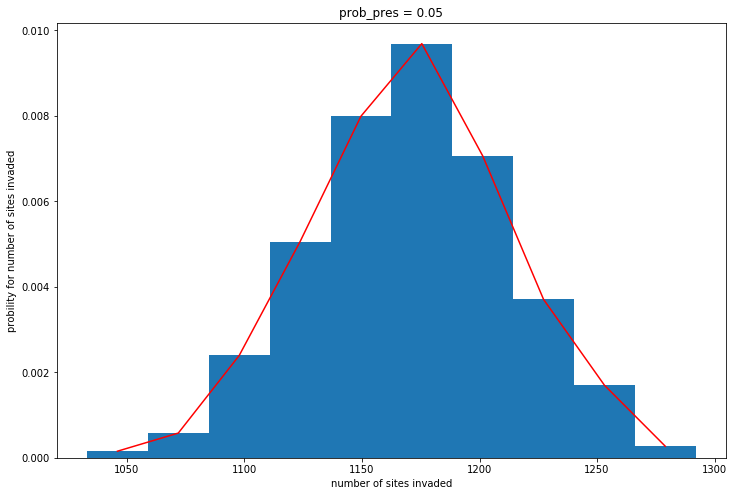

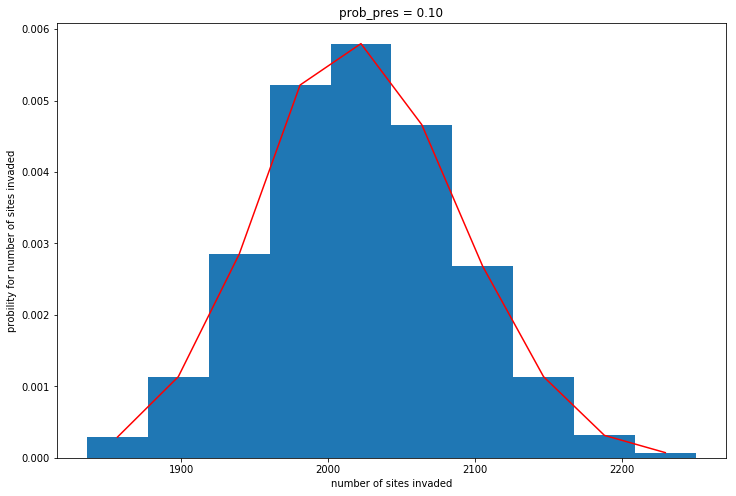

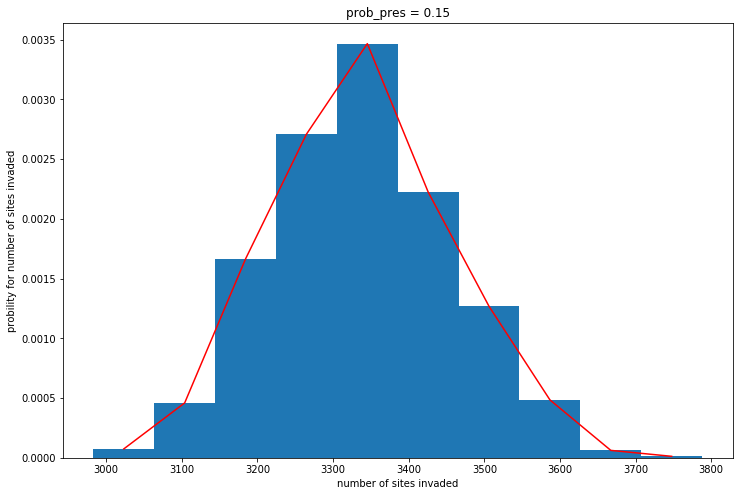

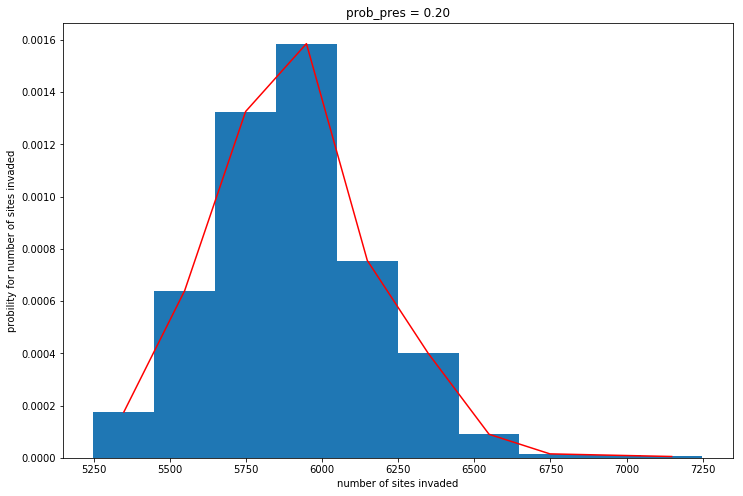

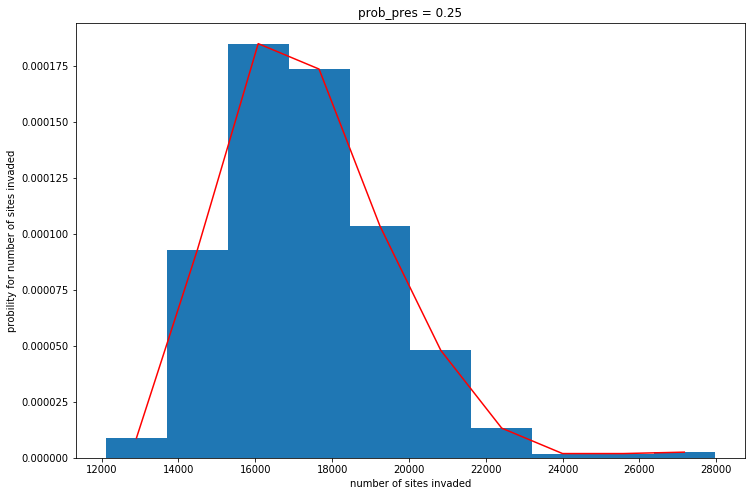

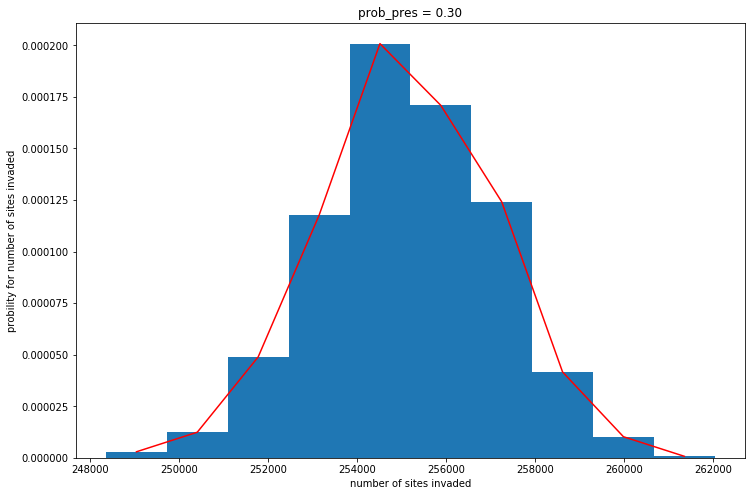

In [16]:
L = 100 # system size
M = 1000

p = linspace(0.0, 0.7, 15)
pcs = zeros(M)
Ns = zeros((len(p), M))

for mi in range(M):
    perc = 0 # flag to signal if other end is reached
    nbetween = 5
    nstep = 1
    nend = len(p)
    z = rand(L, L, L)  # Random distribution of thresholds
    pcluster = zeros((L, L, L)) 

    while nstep < nend:
        p0 = p[nstep] 
        zz = z < p0 
        [lw, num] = measurements.label(zz) 
        
        leftside = lw[0, :, :] 
        il = nonzero(leftside)
        leftnonzero = leftside[il]  
        uniqueleftside = unique(leftnonzero) 
        
        cluster = isin(lw, uniqueleftside)
        pcluster = pcluster + cluster.astype(float)
        Ns[nstep - 1, mi] = len(cluster[cluster == True])
        
        # Check if it has reached the right hand side
        rightside = lw[-1, :, :] 
        ir = nonzero(rightside)
        rightnonzero = rightside[ir] 
        
        span = intersect1d(leftnonzero,rightnonzero)
        nstep = nstep + 1 

        if len(span)>0:
            pcs[mi] = p0
            break         
                       
pis = [1, 2, 3, 4, 5, 6]
print("avg(p_c) = {}".format(mean(pcs)))

for pi in pis:
    p_hist, n_hist = histogram(Ns[pi, :], density=True)
    hist(Ns[pi, :], density=True)
    plot(0.5*(n_hist[1:] + n_hist[:-1]), p_hist, 'r-')
    
    title("prob_pres = {:.2f}".format(p[pi]))
    ylabel("probility for number of sites invaded")
    xlabel("number of sites invaded")
    show()

In [7]:
pcluster_masked.data

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.